
#Assignment Set 8

by **Amir Mehrpanah** for Deep Learing Course at Data Science Center, SBU



In [4]:
#@title Manual Data Injection
files = glob.glob('data/fashion-mnist/*-ubyte')

print(files)
x_test = idx2numpy.convert_from_file(files[3]).reshape(-1,784) # test images
y_test = idx2numpy.convert_from_file(files[2]) # test labels

x_ = idx2numpy.convert_from_file(files[1]).reshape(-1,784) # train images

y_ = idx2numpy.convert_from_file(files[0]) # train labels
print(y_.shape)

x_train, x_val, y_train, y_val = train_test_split(x_, y_, test_size= 0.2)

std = StandardScaler()

x_train = std.fit_transform(x_train)
x_val = std.transform(x_val)
x_test = std.transform(x_test)

x_train = x_train.reshape(-1,28,28,1)
print(x_train.shape)

x_val = x_val.reshape(-1,28,28,1)
print(x_val.shape)

x_test = x_test.reshape(-1,28,28,1)
print(x_test.shape)

['data/fashion-mnist/train-labels-idx1-ubyte', 'data/fashion-mnist/train-images-idx3-ubyte', 'data/fashion-mnist/t10k-labels-idx1-ubyte', 'data/fashion-mnist/t10k-images-idx3-ubyte']
(60000,)
(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#@title Multi Layer CNNs With Different Optimizers
#@markdown Multi Hidden Layer CNNs
epochs =  50#@param {type:"integer"}
verbose =  2#@param {type:"number"}
mdl_pool = {}
for item in 'Adam','RMSprop','Adadelta','SGD':
    name = 'conv_clf_l2_'+item
    
    input = keras.Input(shape=(28,28,1))
    x = layers.Conv2D(32,3,activation="relu",kernel_regularizer=regularizers.l2(1e-4))(input)
    x = layers.Conv2D(32,3,activation='relu',kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128,activation="relu",kernel_regularizer=regularizers.l2(1e-3))(x)
    x = layers.Dropout(0.3)(x)
    output = layers.Dense(10,'softmax')(x)
    model = keras.Model(inputs=input, outputs=output, name=name)
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
            optimizer=item,
            metrics=['accuracy'])
    
    mdl_pool[name] = model.fit(x = x_train, y = y_train,
                            batch_size=64, epochs=epochs,
                            verbose=verbose,validation_data=(x_val,y_val),
                            validation_batch_size = 64).history
    mdl_pool[name]['eval'] = model.evaluate(x_test, y_test)

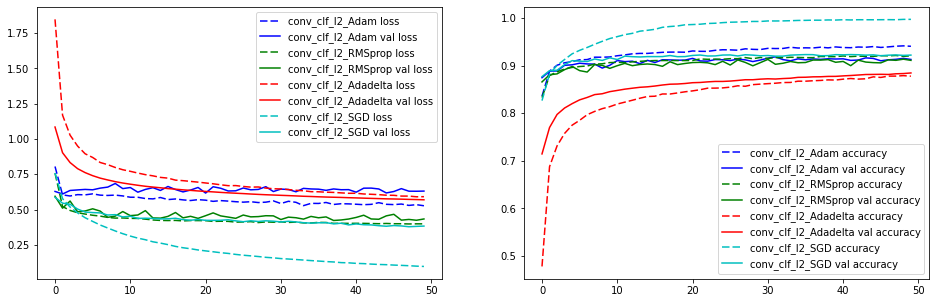

In [24]:
#@title Plot Training History
plt.figure(figsize=(16,5))
c = ['b', 'g', 'r', 'c']
plt.subplot(121)
for i,(name,item) in enumerate(mdl_pool.items()):
    plt.plot(item['loss'],linestyle=(0,(5,2)),color=c[i],label = name+' loss')
    plt.plot(item['val_loss'],color=c[i],label = name+' val loss')
plt.legend()

plt.subplot(122)
for i,(name,item) in enumerate(mdl_pool.items()):
    plt.plot(item['accuracy'],linestyle=(0,(5,2)),color=c[i],label = name +' accuracy')
    plt.plot(item['val_accuracy'],color=c[i],label = name+' val accuracy')
plt.legend()

In [25]:
#@title Evaluation of The Models Trained With Different Optimizers
for n,v in mdl_pool.items():
    print(n)
    print('\tloss',v['eval'][0])
    print('\taccuracy',v['eval'][1])

conv_clf_l2_Adam
	loss 0.6406974196434021
	accuracy 0.9086999893188477
conv_clf_l2_RMSprop
	loss 0.44640594720840454
	accuracy 0.9075000286102295
conv_clf_l2_Adadelta
	loss 0.594047486782074
	accuracy 0.8755000233650208
conv_clf_l2_SGD
	loss 0.42648574709892273
	accuracy 0.9178000092506409
